/home/luke/virtual_environments/py3/lib/python3.6/site-packages/pytc/indiv_models/single_site.py:32: RuntimeWarning: invalid value encountered in sqrt
  ST = (b - np.sqrt((b)**2 - 4*S_conc_corr*self._T_conc))/2


# Fit successful? True
# 2017-09-14 16:25:09.707664
# Units: cal/mol
# Fit type: bayesian
#   bayesian: Burn in: 0.1
#   bayesian: Final sample number: 900000
#   bayesian: Initial walker spread: 0.0001
#   bayesian: Num steps: 10000
#   bayesian: Num threads: 1
#   bayesian: Num walkers: 100
#   bayesian: Use ML guess: True
# AIC: -78.70355087167971
# AICc: -73.10355087167972
# BIC: -70.7103238106285
# F: 2364.1260360988394
# Rsq: 0.9980362863036897
# Rsq_adjusted: 0.9975899877363464
# df: 23
# ln(L): 45.351775435839855
# num_obs: 28
# num_param: 5
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
global,g_K,NA,5.51442e+05,2.09098e+05,2.56706e+05,1.06052e+06,False,1.00000e+06,-inf,inf
global,g_dH,NA,-3.93880e+03,7.25715e+02,-5.69130e+03,-2.82329e+03,False,-4.00000e+03,-inf,inf
global,g_fx,NA,1.43195e+00,1.88999e-02,1.39610e+00,1.47083e+00,False,1.00000e+00,5.00000e-01,2.00000e+00
global,g_dilution,NA,-1.40805e+04,1.04626e+04,-3.82907e+04,3.14667e+03,False,

/home/luke/virtual_environments/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


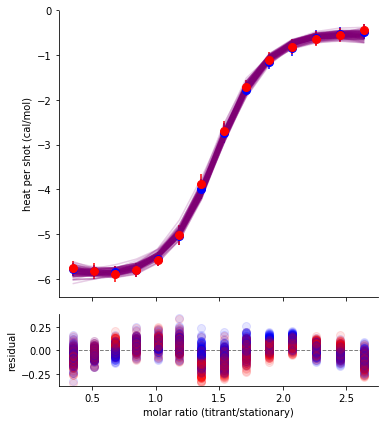

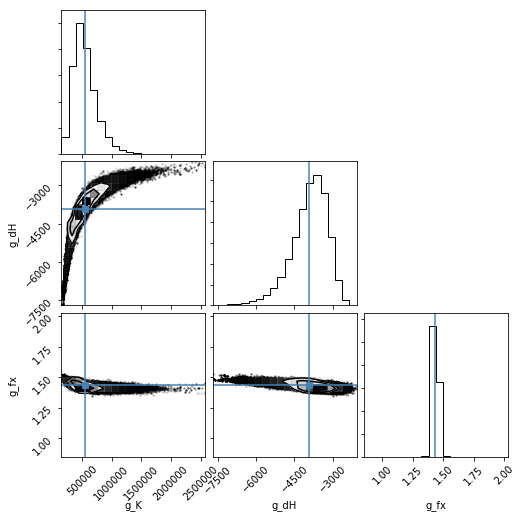

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model.  Ignore the first two shots
a = pytc.ITCExperiment("hA5C43SC79SCuTESrep2.sedphat",pytc.indiv_models.SingleSite,shot_start=2)
b = pytc.ITCExperiment("hA5C43SC79SCuTESrep3.sedphat",pytc.indiv_models.SingleSite,shot_start=2)


# Add the experiment to the fitter
g.add_experiment(a)
g.add_experiment(b)
#g.update_fixed("fx_competent",1.0,a)

#g.update_bounds("fx_competent",(0.50,2.5), a)
#g.update_bounds("fx_competent",(0.50,2.5), b)

g.link_to_global(a,"K","g_K")
g.link_to_global(b,"K","g_K")

g.link_to_global(a,"dH","g_dH")
g.link_to_global(b,"dH","g_dH")

g.link_to_global(a,"fx_competent","g_fx")
g.link_to_global(b,"fx_competent","g_fx")

g.link_to_global(a,"dilution_heat","g_dilution")
g.link_to_global(b,"dilution_heat","g_dilution")

g.link_to_global(a,"dilution_intercept","g_intercept")
g.link_to_global(b,"dilution_intercept","g_intercept")

g.update_bounds("g_fx",(0.50,2))

# --------------------------------------------------------------------
# Fit the data
F = pytc.fitters.BayesianFitter(num_steps=10000,ml_guess=True,initial_walker_spread=0.0001,burn_in=0.10)
g.fit(F)

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
plt.savefig("Bayesian_fit.pdf")
c = g.corner_plot()
plt.savefig("corner-plot.pdf")

print(g.fit_as_csv)